<a href="https://colab.research.google.com/github/sumit2663/FUTURE_ML_01/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install prophet pandas matplotlib scikit-learn --quiet

In [11]:
import pandas as pd
import numpy as np

# Generate 1 year of daily sales data
dates = pd.date_range(start="2024-07-01", end="2025-07-01", freq="D")
sales = 300 + 30*np.sin(np.linspace(0, 8*np.pi, len(dates))) + np.random.normal(0, 20, len(dates))

df = pd.DataFrame({'Date': dates, 'Sales': sales})
df.to_csv("sales_data.csv", index=False)
df.head()

,Date,Sales
0,2024-07-01,293.804664
1,2024-07-02,295.858861
2,2024-07-03,297.684494
3,2024-07-04,324.316260
4,2024-07-05,293.460796


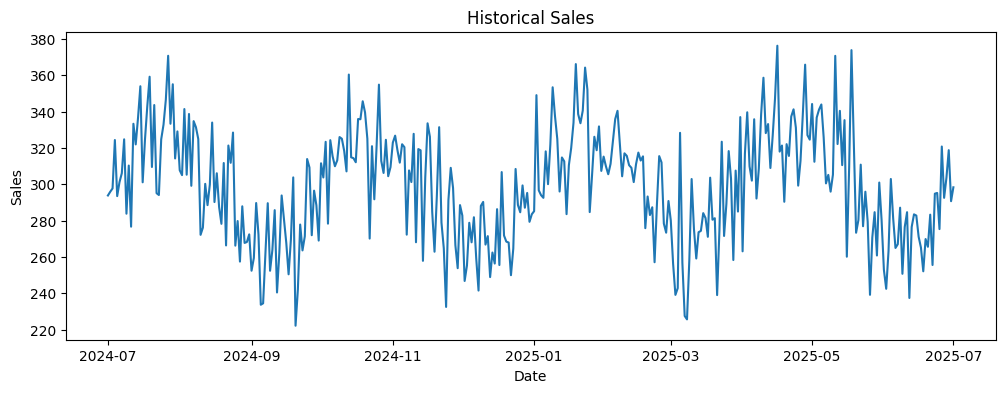

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Sales'])
plt.title("Historical Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeeblezzp/5lfzlpxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeeblezzp/v9vspfsd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37777', 'data', 'file=/tmp/tmpeeblezzp/5lfzlpxt.json', 'init=/tmp/tmpeeblezzp/v9vspfsd.json', 'output', 'file=/tmp/tmpeeblezzp/prophet_model3nwv4hq8/prophet_model-20250729075401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


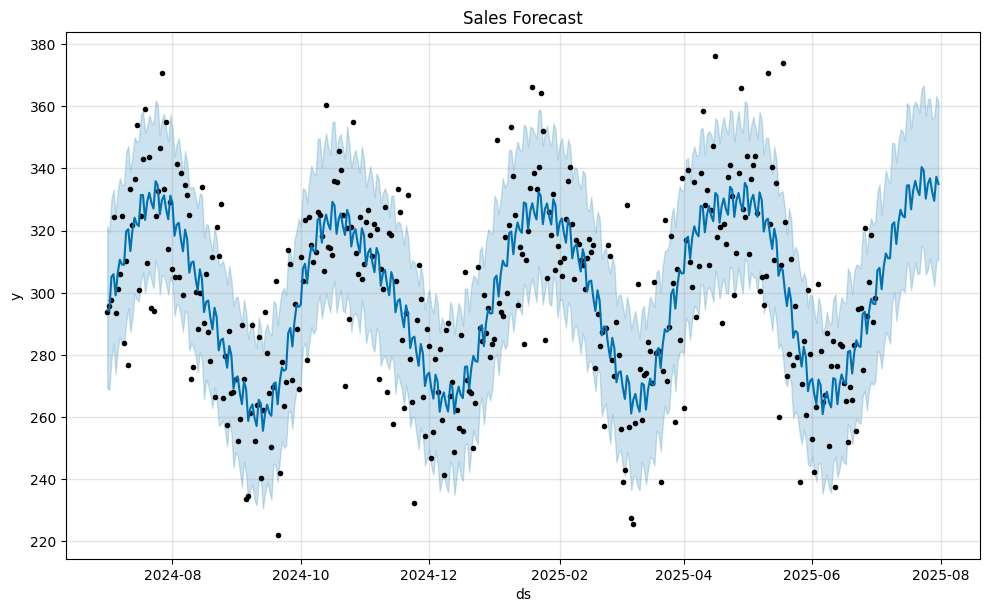

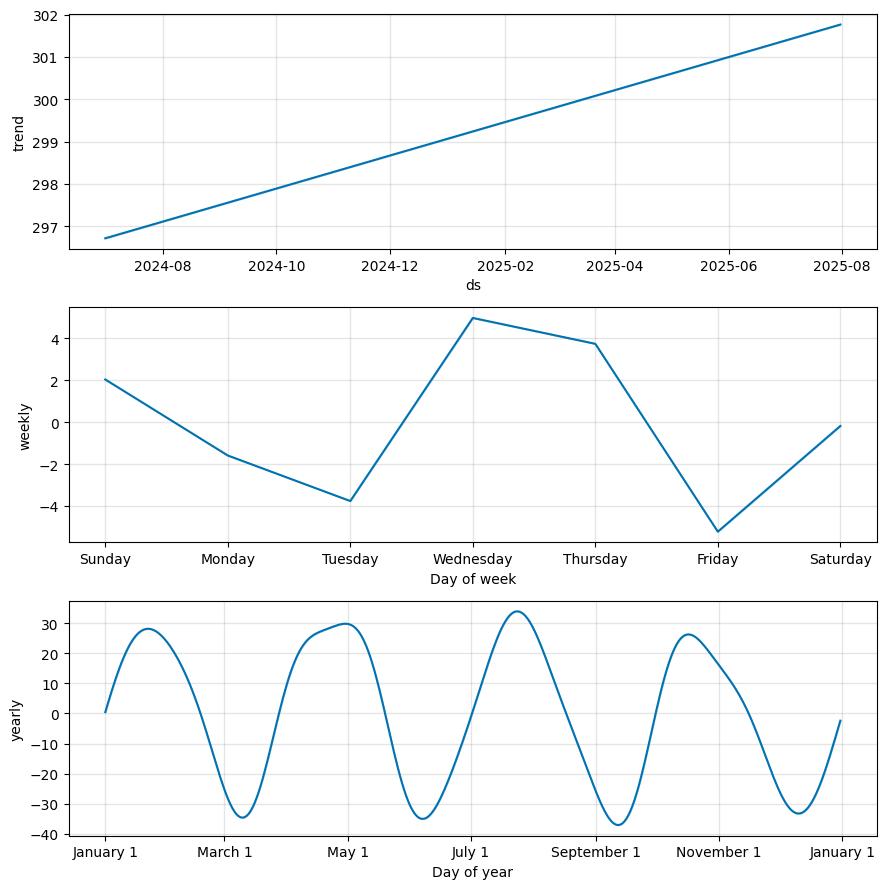

In [13]:
from prophet import Prophet

p_df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(p_df)

# Forecast next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Sales Forecast")
plt.show()

model.plot_components(forecast)
plt.show()

In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("forecast.csv", index=False)
from google.colab import files
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
from google.colab import files
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>